<a href="https://colab.research.google.com/github/Mahmoud0090/deep-learning-models/blob/main/drugs_labels_PaddleOCR_%26_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

In [ ]:
!pip install paddleocr

In [4]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 22193, done.
remote: Counting objects: 100% (1733/1733), done.
remote: Compressing objects: 100% (683/683), done.
remote: Total 22193 (delta 1185), reused 1513 (delta 1045), pack-reused 20460
Receiving objects: 100% (22193/22193), 158.99 MiB | 31.77 MiB/s, done.
Resolving deltas: 100% (14963/14963), done.


In [5]:
from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
import cv2 
import os 

In [16]:
ocr = PaddleOCR(lang = 'en')

[2021/09/09 21:47:45] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/09/09 21:47:45] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/09/09 21:47:45] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_li

In [39]:
img_path = '/content/drug1.jpg'

results = ocr.ocr(img_path)

[2021/09/09 22:04:33] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2021/09/09 22:04:33] root DEBUG: dt_boxes num : 6, elapse : 0.027562856674194336
[2021/09/09 22:04:33] root DEBUG: rec_res num  : 6, elapse : 0.04272174835205078


In [40]:
results

[[[[220.0, 198.0], [288.0, 201.0], [288.0, 215.0], [219.0, 213.0]],
  ('50MCG TABLETS', 0.9406472)],
 [[[218.0, 218.0], [335.0, 215.0], [336.0, 232.0], [219.0, 235.0]],
  ('TAKE ONE TABLETBYI', 0.97218204)],
 [[[219.0, 232.0], [284.0, 235.0], [283.0, 250.0], [218.0, 246.0]],
  ('EVERY DAY', 0.95362866)],
 [[[219.0, 256.0], [253.0, 259.0], [252.0, 274.0], [218.0, 272.0]],
  ('OTY:90', 0.85625696)],
 [[[217.0, 275.0], [331.0, 272.0], [332.0, 289.0], [218.0, 293.0]],
  ('UAY REFILL 4X BY 12-012', 0.9339267)],
 [[[221.0, 289.0], [293.0, 292.0], [293.0, 306.0], [220.0, 304.0]],
  ('12012019', 0.9921103)]]

In [41]:
for res in results:
  print(res[1][0])

50MCG TABLETS
TAKE ONE TABLETBYI
EVERY DAY
OTY:90
UAY REFILL 4X BY 12-012
12012019


In [42]:
# Extracting detected components
boxes = [res[0] for res in result] 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [43]:
#specifying font path for draw_ocr method
font_path = '/content/PaddleOCR/doc/fonts/latin.ttf'

In [44]:
img = cv2.imread(img_path) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

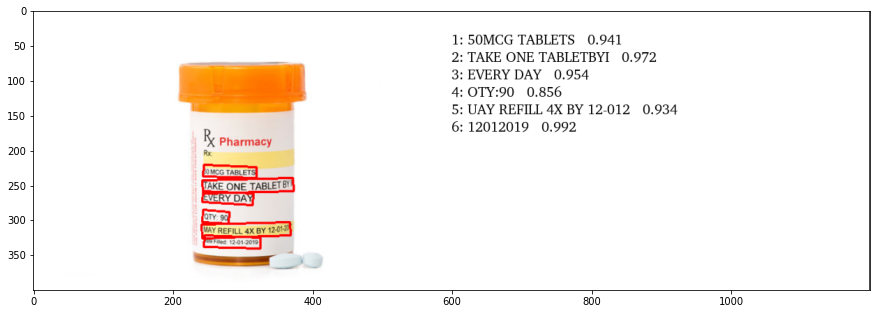

In [45]:
#visualize the image and detection

plt.figure(figsize=(15,15))

annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

plt.imshow(annotated)